In [1]:
import live2p
from live2p.analysis import process_data, clean_data, min_subtract, baseline_subtract
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy.stats as stats
import sklearn

In [2]:
import h5py

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
base = 'D:/Frankenrig/Experiments'
mouse = 'w32_2'
date = '20210420'
epoch = '1'

path = Path(base, mouse, date, epoch)

In [5]:
jfile = list(path.glob('*json'))[0]
with open(jfile, 'r') as f:
    jfile = json.load(f)

In [6]:
jfile.keys()

dict_keys(['c', 'splits'])

In [7]:
data, trialwise_data = process_data(**jfile, normalizer='zscore', fr=6.36, )

In [8]:
data.shape

(442, 3685)

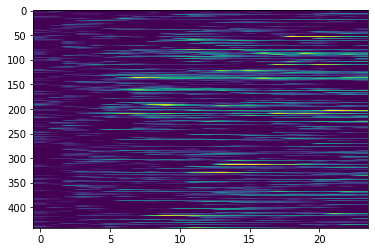

In [9]:
plt.imshow(trialwise_data[2,:,:], aspect='auto', vmin=0, vmax=2)

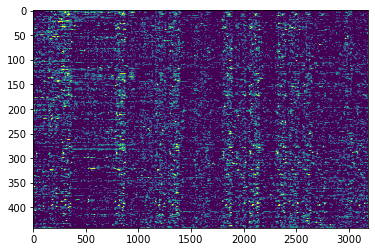

In [10]:
plt.imshow(data[:,500:], aspect='auto', vmin=0, vmax=2)

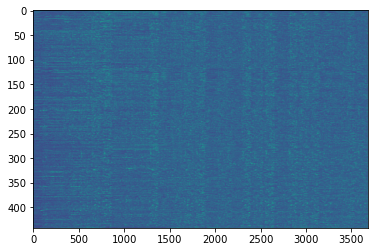

In [11]:
traces = np.asarray(jfile['c'])
traces_min = min_subtract(traces)
traces_norm = stats.zscore(traces_min, axis=1)

plt.imshow(traces_norm, aspect='auto')

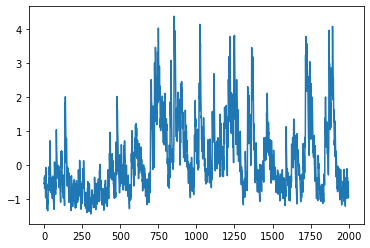

In [12]:
plt.plot(traces_norm[1,:2000])

In [13]:
import pandas as pd
def rolling_baseline_dff(traces):
    f0s = pd.DataFrame(traces.T).rolling(200, min_periods=1, center=True).quantile(0.2)
    f0s = f0s.values.T
    traces = (traces-f0s)/f0s
    return traces

Text(0.5, 1.0, 'rolling zscore')

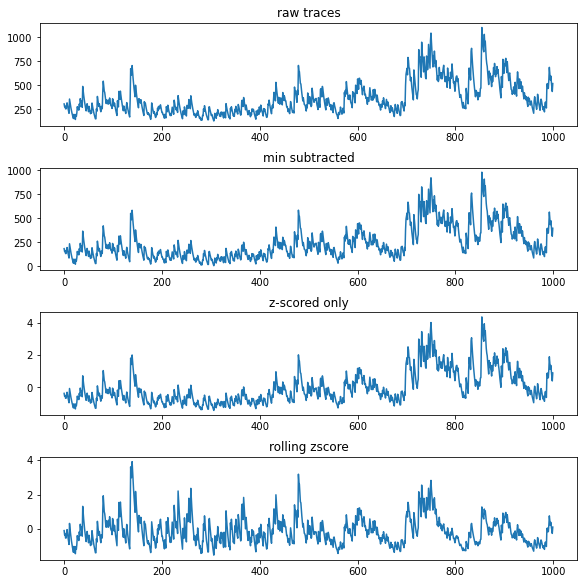

In [14]:
fig, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))

cell = 1
win = slice(0,1000)

ax = axes[0]
ax.plot(traces[cell,win])
ax.set_title('raw traces')

ax = axes[1]
ax.plot(traces_min[cell,win])
ax.set_title('min subtracted')

ax = axes[2]
ax.plot(traces_norm[cell,win])
ax.set_title('z-scored only')

ax = axes[3]
traces_rolling = rolling_baseline_dff(traces_min)
traces_norm_zd = stats.zscore(traces_rolling, axis=1)
ax.plot(traces_norm_zd[cell,win])
ax.set_title('rolling zscore')

In [16]:
pth = 'e:/caiman_scratch/test_data/ori/data/live2p/out/realtime_results_plane_0.hdf5'
h = h5py.File(pth, 'r')

In [20]:
h.keys()

RuntimeError: Can't determine # of objects (addr overflow, addr = 1173672516, size = 328, eoa = 408374348)

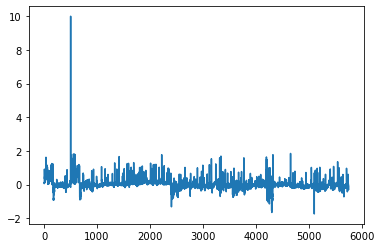

In [15]:
plt.plot(s[:,0])

In [23]:
h['estimates'].keys()

<KeysViewHDF5 ['A', 'A_thr', 'Ab', 'Ab_dense', 'AtA', 'AtY_buf', 'C', 'CC', 'CY', 'C_on', 'Cf', 'F_dff', 'OASISinstances', 'R', 'S', 'SNR_comp', 'W', 'YrA', 'Yr_buf', 'Yres_buf', 'b', 'b0', 'bl', 'c1', 'center', 'cnn_preds', 'dims', 'discarded_components', 'ecc', 'f', 'g', 'idx_components', 'idx_components_bad', 'ind_new', 'lam', 'mean_buff', 'mn', 'nC', 'neurons_sn', 'noisyC', 'nr', 'r_values', 'rho_buf', 'shifts', 'sn', 'sv', 'time_new_comp', 'vr']>

In [26]:
h['estimates']['ecc']

<HDF5 dataset "ecc": shape (), type "|O">

In [37]:
h['estimates']['shifts'][:].shape

(5750, 2)

In [43]:
h['estimates']['f']

KeyError: 'Unable to open object (bad object header version number)'